<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


DONE WITH LOVE

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [174]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [175]:



# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [176]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [177]:
df = pd.read_csv("Weather_Data.csv")

> Note: This version of the lab is designed for JupyterLite, which necessitates downloading the dataset to the interface. However, when working with the downloaded version of this notebook on your local machines (Jupyter Anaconda), you can simply **skip the steps above of "Importing the Dataset"** and use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [178]:
#filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
#df = pd.read_csv(filepath)

In [179]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [180]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [181]:
df_sydney_processed.head(5)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False


Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [182]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False


### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [183]:
df_sydney_processed.drop('Date',axis=1,inplace=True)
df_sydney_processed.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41,17,20,92,84,...,False,False,False,False,False,True,False,False,False,False
1,19.5,25.6,6.0,3.4,2.7,41,9,13,83,73,...,False,False,False,False,False,False,False,False,False,False


In [184]:
df_sydney_processed = df_sydney_processed.astype(float)
df_sydney_processed.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [186]:
#Enter Your Code and Execute
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)


#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [187]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [188]:
y_hat = LinearReg.predict(x_test)

#### Q4) Using the `y_hat` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [189]:
def smape_score(y_test, y_hat):
    n = len(y_test)
    numerator = 2 * np.abs(y_test - y_hat)
    denominator = (y_test + y_hat)

    return  1 / n * np.sum(numerator / denominator)

In [190]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test, y_hat)
LinearRegression_SMAPE = smape_score(y_test, y_hat)
LinearRegression_RMSE = metrics.root_mean_squared_error(y_test, y_hat)
LinearRegression_R2 = metrics.r2_score(y_test, y_hat)

#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [191]:
Report = pd.DataFrame({
    "Metric": ["MAE","SMAPE", "RMSE", "R2"],
    "Value": [LinearRegression_MAE,LinearRegression_SMAPE, LinearRegression_RMSE, LinearRegression_R2]
})

print(Report)

  Metric     Value
0    MAE  0.256318
1  SMAPE  0.908628
2   RMSE  0.340177
3     R2  0.427132


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [192]:
KNN = KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [193]:
#Enter Your Code and Execute

In [194]:
KNN.fit(x_train, y_train)
y_hat = KNN.predict(x_test)

KNNComparison_df = pd.DataFrame({'y_hat': y_hat, 'y_test': y_test})

KNNComparison_df.head(100)



,y_hat,y_test
3066,0.0,0.0
2456,0.0,0.0
1629,1.0,1.0
838,0.0,1.0
2506,0.0,0.0
...,...,...
984,1.0,1.0
1728,0.0,0.0
860,1.0,1.0
1092,0.0,0.0


#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [195]:
#Enter Your Code and Execute

KNN Accuracy Score: 0.8183206106870229
KNN Jaccard Index: 0.4251207729468599
KNN F1P Score: [0.59661017]
KNN F1N Score: [0.88275862]


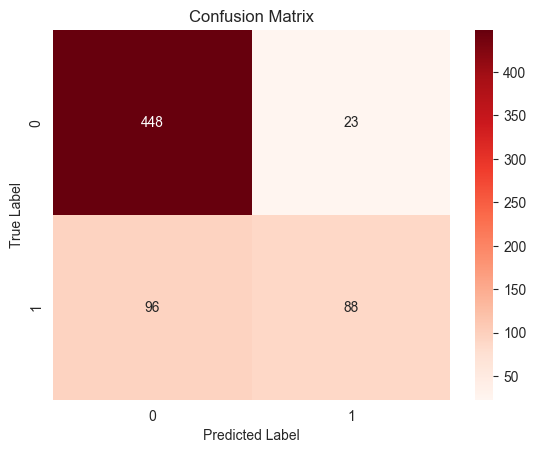

In [196]:
from matplotlib import pyplot as plt

KNN_Accuracy_Score = accuracy_score(y_test, y_hat)
KNN_JaccardIndex = jaccard_score(y_test, y_hat)

print("KNN Accuracy Score:", KNN_Accuracy_Score)
print("KNN Jaccard Index:", KNN_JaccardIndex)

KNN_F1_Score = f1_score(y_test, y_hat) 
KNN_F1P_Score = f1_score(y_test, y_hat,average=None, labels=[1]) 
KNN_F1N_Score = f1_score(y_test, y_hat,average=None, labels=[0])
print("KNN F1P Score:", KNN_F1P_Score)
print("KNN F1N Score:", KNN_F1N_Score)
import seaborn as sea
conf_matrix = confusion_matrix(y_test, y_hat)

sea.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [197]:
#Enter Your Code and Execute

In [198]:
Tree = DecisionTreeClassifier()

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [199]:
#Enter Your Code and Execute

In [200]:
Tree.fit(x_train, y_train)
y_hat = Tree.predict(x_test)

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [201]:
#Enter Your Code and Execute

Tree Accuracy Score: 0.7557251908396947
Tree Jaccard Index: 0.40298507462686567
Tree F1P Score: [0.57446809]
Tree F1N Score: [0.82869379]


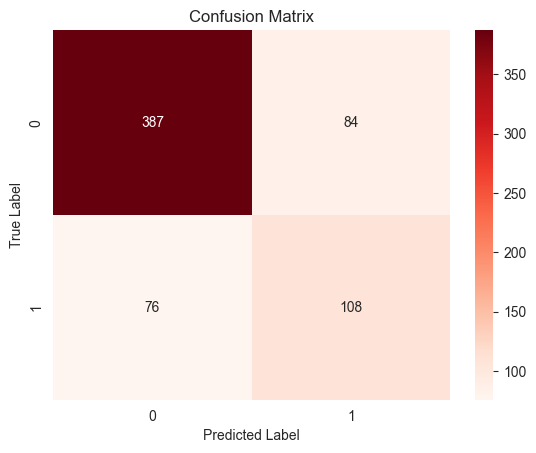

In [202]:
from matplotlib import pyplot as plt

Tree_Accuracy_Score = accuracy_score(y_test, y_hat)
Tree_JaccardIndex = jaccard_score(y_test, y_hat)

print("Tree Accuracy Score:", Tree_Accuracy_Score)
print("Tree Jaccard Index:", Tree_JaccardIndex)

Tree_F1_Score = f1_score(y_test, y_hat) 
Tree_F1P_Score = f1_score(y_test, y_hat,average=None, labels=[1]) 
Tree_F1N_Score = f1_score(y_test, y_hat,average=None, labels=[0])
print("Tree F1P Score:", Tree_F1P_Score)
print("Tree F1N Score:", Tree_F1N_Score)
import seaborn as sea
conf_matrix = confusion_matrix(y_test, y_hat)

sea.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [203]:
#Enter Your Code and Execute

In [204]:
x_train, x_test, y_train, y_test = train_test_split(features, Y,test_size=0.2, random_state=1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [205]:
#Enter Your Code and Execute

In [206]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [207]:
y_hat = LR.predict(x_test)

In [208]:
y_hat_proba = LR.predict_proba(x_test)

In [209]:
y_hat_proba_1 = np.round(y_hat_proba[:,1],3)

print(y_hat_proba_1)

[0.344 0.021 0.432 0.391 0.017 0.973 0.303 0.056 0.163 0.033 0.825 0.328
 0.435 0.054 0.03  0.025 0.588 0.096 0.1   0.032 0.452 0.724 0.041 0.061
 0.13  0.024 0.062 0.065 0.233 0.133 0.629 0.006 0.311 0.547 0.662 0.357
 0.627 0.064 0.809 0.038 0.396 0.063 0.429 0.1   0.017 0.033 0.366 0.36
 0.184 0.322 0.614 0.086 0.44  0.059 0.54  0.921 0.008 0.052 0.09  0.028
 0.012 0.411 0.021 0.076 0.158 0.075 0.118 0.047 0.088 0.091 0.038 0.937
 0.131 0.135 0.01  0.111 0.119 0.053 0.035 0.115 0.068 0.203 0.633 0.016
 0.76  0.126 0.033 0.042 0.919 0.031 0.263 0.425 0.342 0.16  0.415 0.408
 0.253 0.399 0.1   0.366 0.089 0.869 0.024 0.814 0.46  0.508 0.145 0.075
 0.127 0.369 0.029 0.026 0.691 0.667 0.094 0.263 0.644 0.19  0.039 0.225
 0.762 0.024 0.106 0.338 0.078 0.134 0.185 0.059 0.434 0.043 0.053 0.258
 0.018 0.072 0.778 0.487 0.077 0.036 0.008 0.774 0.153 0.873 0.333 0.038
 0.013 0.754 0.138 0.933 0.867 0.046 0.019 0.261 0.961 0.018 0.098 0.852
 0.127 0.109 0.515 0.43  0.745 0.062 0.607 0.554 0.0

In [210]:
LRComparison_df = pd.DataFrame({'y_hat_proba':y_hat_proba_1,'y_hat': y_hat, 'y_test': y_test})
LRComparison_df.head(50)

,y_hat_proba,y_hat,y_test
255,0.344,0.0,0.0
1552,0.021,0.0,0.0
1353,0.432,0.0,0.0
1060,0.391,0.0,0.0
808,0.017,0.0,0.0
836,0.973,1.0,1.0
2108,0.303,0.0,0.0
3005,0.056,0.0,0.0
1401,0.163,0.0,0.0
602,0.033,0.0,0.0


#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [211]:
#Enter Your Code and Execute

LR F1P Score: [0.63722397]
LR F1N Score: [0.88418933]


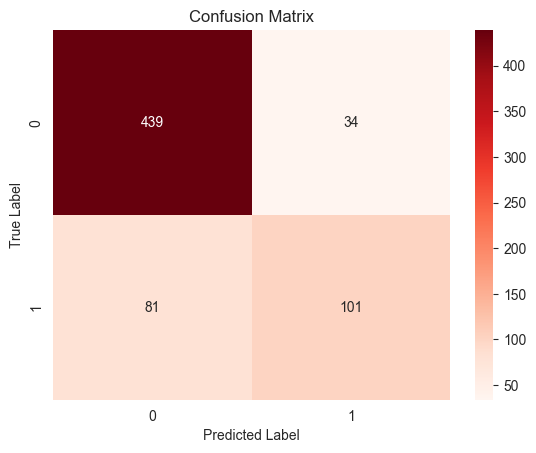

In [212]:
LR_Accuracy_Score = accuracy_score(y_test, y_hat)
LR_JaccardIndex = jaccard_score(y_test, y_hat)


LR_F1_Score = f1_score(y_test, y_hat) 
LR_F1P_Score = f1_score(y_test, y_hat,average=None, labels=[1]) 
LR_F1N_Score = f1_score(y_test, y_hat,average=None, labels=[0])
print("LR F1P Score:", 
LR_F1P_Score)
print("LR F1N Score:", 
LR_F1N_Score)
import seaborn as sea
conf_matrix = confusion_matrix(y_test, y_hat)

sea.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


LR_Log_Loss = log_loss(y_test, y_hat_proba_1)

### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [213]:
#Enter Your Code and Execute

In [214]:
SVM = svm.SVC(class_weight={0:2, 1:5})
SVM.fit(x_train, y_train)

SVC(class_weight={0: 2, 1: 5})

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [215]:
#Enter Your Code and Execute

In [216]:
y_hat = SVM.predict(x_test)
print(y_hat)

[0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.

In [217]:
SVMComparison_df = pd.DataFrame({'y_hat': y_hat, 'y_test': y_test})
SVMComparison_df.head(50)

,y_hat,y_test
255,0.0,0.0
1552,0.0,0.0
1353,1.0,0.0
1060,1.0,0.0
808,0.0,0.0
836,1.0,1.0
2108,1.0,0.0
3005,0.0,0.0
1401,0.0,0.0
602,0.0,0.0


#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


SVM F1P Score: [0.67597765]
SVM F1N Score: [0.87815126]


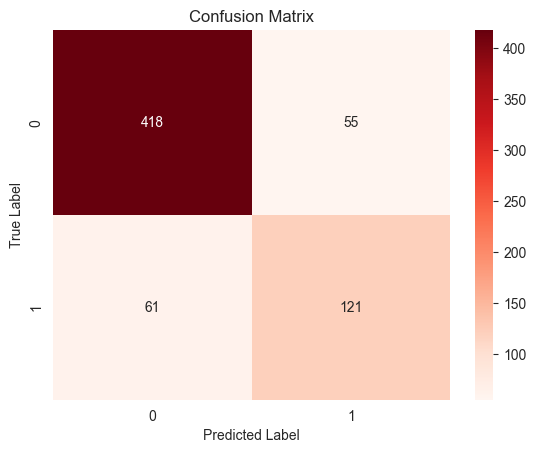

In [218]:
SVM_Accuracy_Score = accuracy_score(y_test, y_hat)
SVM_JaccardIndex = jaccard_score(y_test, y_hat)

SVM_F1_Score = f1_score(y_test, y_hat) 
SVM_F1P_Score = f1_score(y_test, y_hat,average=None, labels=[1]) 

SVM_F1N_Score = f1_score(y_test, y_hat,average=None, labels=[0])
print("SVM F1P Score:", SVM_F1P_Score)
print("SVM F1N Score:", SVM_F1N_Score)
import seaborn as sea
conf_matrix = confusion_matrix(y_test, y_hat)

sea.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [223]:
results = {
    "Model": ['KNN', 'DecisionTree','LogisticRegression','SVM'],
    "Accuracy": [
        KNN_Accuracy_Score,
        Tree_Accuracy_Score,
        LR_Accuracy_Score,
        SVM_Accuracy_Score
    ],
    "Jaccard Index": [
        KNN_JaccardIndex,
        Tree_JaccardIndex,
        LR_JaccardIndex,
        SVM_JaccardIndex
    ],
    "F1-Score": [
        KNN_F1_Score,
        Tree_F1_Score,
        LR_F1_Score,
        SVM_F1_Score
    ],
    "Log Loss": [
        LR_Log_Loss,
        None,
        None,
        None
    ],
}

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

Report = results_df

                Model  Accuracy  Jaccard Index  F1-Score  Log Loss
0                 KNN  0.818321       0.425121  0.596610  0.384093
1        DecisionTree  0.755725       0.402985  0.574468       NaN
2  LogisticRegression  0.824427       0.467593  0.637224       NaN
3                 SVM  0.822901       0.510549  0.675978       NaN


<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |
--!>